Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4667 - loss: 0.6888 - val_accuracy: 0.7286 - val_loss: 0.6789
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8667 - loss: 0.6725 - val_accuracy: 0.7143 - val_loss: 0.6685
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9000 - loss: 0.6567 - val_accuracy: 0.7143 - val_loss: 0.6585
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.9000 - loss: 0.6414 - val_accuracy: 0.7286 - val_loss: 0.6488
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.9000 - loss: 0.6265 - val_accuracy: 0.7286 - val_loss: 0.6395
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9000 - loss: 0.6120 - val_accuracy: 0.7286 - val_loss: 0.6306
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9000 - loss: 0.5980 - val_accuracy: 0.7286 - val_loss: 0.6219
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9000 - loss: 0.5844 - val_accuracy: 0.7143 - val_loss: 0.6135
Epoch 9/10
1

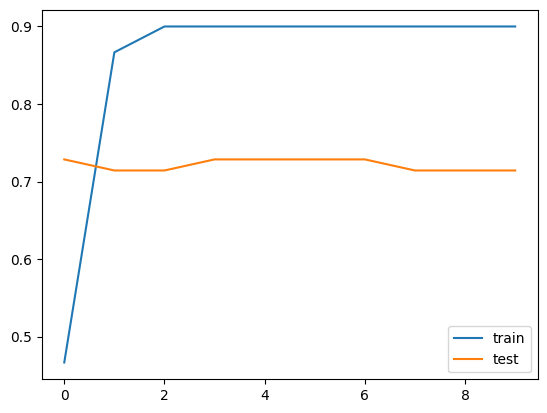

In [ ]:
from matplotlib import pyplot
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
X,Y=make_moons(n_samples=100,noise=0.2,random_state=1)
n_train=30
trainX,testX=X[:n_train,:],X[n_train:]
trainY,testY=Y[:n_train],Y[n_train:]
#print(trainX)
#print(trainY)
#print(testX)
#print(testY)
model=Sequential()
model.add(Dense(500,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(trainX,trainY,validation_data=(testX,testY),epochs=10)
pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend()
pyplot.show()

The above code and resultant graph demonstrate overfitting with accuracy of testing data less than accuracy of training data also the accuracy of testing data increases once and then start decreases gradually.to solve this problem we can use regularization . Hence, we will add two lines in the above code as highlighted below to implement L2 regularization with alpha=0.

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4000 - loss: 0.7059 - val_accuracy: 0.5571 - val_loss: 0.6953
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7667 - loss: 0.6889 - val_accuracy: 0.6429 - val_loss: 0.6844
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8667 - loss: 0.6723 - val_accuracy: 0.6429 - val_loss: 0.6738
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8667 - loss: 0.6562 - val_accuracy: 0.6571 - val_loss: 0.6637
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8667 - loss: 0.6406 - val_accuracy: 0.6857 - val_loss: 0.6539
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8667 - loss: 0.6254 - val_accuracy: 0.6857 - val_loss: 0.6445
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.8333 - loss: 0.6107 - val_accuracy: 0.6857 - val_loss: 0.6355
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.8333 - loss: 0.5964 - val_accuracy: 0.6857 - val_loss: 0.6268


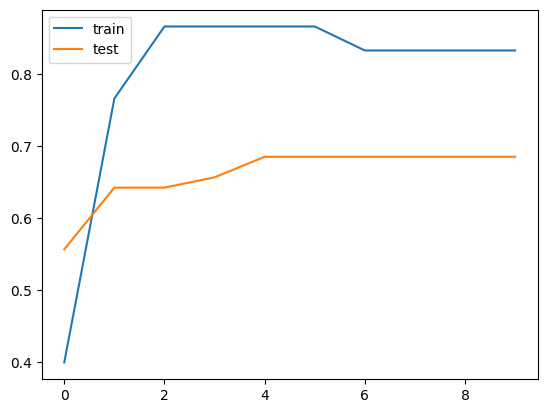

In [3]:
from matplotlib import pyplot
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
X,Y=make_moons(n_samples=100,noise=0.2,random_state=1)
n_train=30
trainX,testX=X[:n_train,:],X[n_train:]
trainY,testY=Y[:n_train],Y[n_train:]
#print(trainX)
#print(trainY)
#print(testX)
#print(testY)
model=Sequential()
model.add(Dense(500,input_dim=2,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(trainX,trainY,validation_data=(testX,testY),epochs=10)
pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend()
pyplot.show()


By replacing L2 regularizer with L1 regularizer at the same learning rate 0.001 we get the  following output

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1333 - loss: 0.8009 - val_accuracy: 0.3000 - val_loss: 0.7707
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.1333 - loss: 0.7829 - val_accuracy: 0.4143 - val_loss: 0.7590
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.3000 - loss: 0.7654 - val_accuracy: 0.6286 - val_loss: 0.7478
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7000 - loss: 0.7483 - val_accuracy: 0.7143 - val_loss: 0.7370
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8667 - loss: 0.7318 - val_accuracy: 0.7143 - val_loss: 0.7266
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8667 - loss: 0.7158 - val_accuracy: 0.7143 - val_loss: 0.7165
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8667 - loss: 0.7003 - val_accuracy: 0.7143 - val_loss: 0.7069
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.8667 - loss: 0.6852 - val_accuracy: 0.7143 - val_loss: 0.6976
E

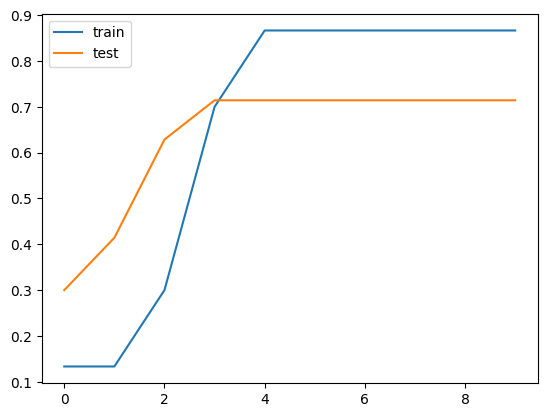

In [8]:
# By applying l1 and l2 regularizer we can observe the following changes in accuracy of both trainig and testing data. The changes in code are also highlighted.
from matplotlib import pyplot
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1_l2
X,Y=make_moons(n_samples=100,noise=0.2,random_state=1)
n_train=30
trainX,testX=X[:n_train,:],X[n_train:]
trainY,testY=Y[:n_train],Y[n_train:]
#print(trainX)
#print(trainY)
#print(testX)
#print(testY)
model=Sequential()
model.add(Dense(500,input_dim=2,activation='relu',kernel_regularizer=l1_l2(l1=0.001,l2=0.001)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(trainX,trainY,validation_data=(testX,testY),epochs=10)
pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend()
pyplot.show()